금리변동   공공데이터포탈  https://www.data.go.kr/data/15073015/fileData.do

비트코인     비트코인 과거 데이터 - https://kr.investing.com/crypto/bitcoin/historical-data 인베스팅코리아

코스피 주식변동 월별 http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0301 KRX 정보데이터시스템

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# 비트코인

In [ ]:
coin = pd.read_csv('./coin2.csv', parse_dates=['날짜'],encoding = 'cp949')  # 날짜를 datetime으로 변환, 인코딩
coin1 = coin.copy()                                                         # 원본데이터를 지키기위해 카피하여 사용
coin1

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2010-07-18,0.1,0,0.1,0.1,0.08K,0.00%
1,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
2,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
3,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
...,...,...,...,...,...,...,...
4228,2022-02-13,"42,061.10","42,205.50","42,725.10","41,880.10",25.88K,-0.34%
4229,2022-02-14,"42,550.30","42,061.10","42,799.70","41,591.30",53.60K,1.16%
4230,2022-02-15,"44,544.40","42,550.30","44,722.60","42,460.10",56.34K,4.69%
4231,2022-02-16,"43,883.60","44,540.90","44,552.90","43,377.60",41.40K,-1.48%


In [ ]:
coin1 = coin1.drop(['오픈','고가','저가','변동 %'],axis=1)            # 사용안할 데이터 드랍하여 필터링
coin1

,날짜,종가,거래량
0,2010-07-18,0.1,0.08K
1,2010-07-19,0.1,0.57K
2,2010-07-20,0.1,0.26K
3,2010-07-21,0.1,0.58K
4,2010-07-22,0.1,2.16K
...,...,...,...
4228,2022-02-13,"42,061.10",25.88K
4229,2022-02-14,"42,550.30",53.60K
4230,2022-02-15,"44,544.40",56.34K
4231,2022-02-16,"43,883.60",41.40K


In [ ]:
coin1.dtypes

날짜     datetime64[ns]
종가             object
거래량            object
dtype: object

In [ ]:
date = (coin1['날짜'] >= '2018-12-01') & (coin1['날짜'] <= '2020-10-30')    # 수집한 타 데이터들의 쌓인 날짜까지 인덱싱

In [ ]:
filtered_co=coin1.loc[date]     # 필터링한 데이터 조건으로 새로운 데이터프레임 생성
filtered_co
# filtered_co.info()            # 종가와 거래량은 오브젝트다 바꿔야 사용가능하다

,날짜,종가,거래량
3058,2018-12-01,"4,196.20",316.30K
3059,2018-12-02,"4,160.40",298.63K
3060,2018-12-03,"3,897.80",355.10K
3061,2018-12-04,"3,958.50",326.71K
3062,2018-12-05,"3,771.60",341.60K
...,...,...,...
3753,2020-10-26,"13,061.60",89.47K
3754,2020-10-27,"13,657.80",128.64K
3755,2020-10-28,"13,278.90",144.18K
3756,2020-10-29,"13,457.20",111.23K


In [ ]:
filtered_co['거래량']=filtered_co['거래량'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
# 거래량은 데이터에 저장되기를 103K, 10.3M형식으로 되어있었다.  
# regex=True를 설정해 정규 표현식으로 문자열 치환을 원하는 부분만 사용가능하게 하고
# map과 eval을 사용해 전체행의 문자열을 astype으로 int형으로 치환하여 계산
# https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe 자세한 사항

C:\Users\User\AppData\Local\Temp/ipykernel_16204/1455338616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_co['거래량']=filtered_co['거래량'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)


In [ ]:
filtered_co['종가']=filtered_co['종가'].str.replace(',', '').astype('float')     # ,를 제외시키고 object형에서 float형으로 치환
filtered_co.apply(pd.to_numeric)
filtered_co

C:\Users\User\AppData\Local\Temp/ipykernel_16204/4130074795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_co['종가']=filtered_co['종가'].str.replace(',', '').astype('float')     # ,를 제외시키고 object형에서 float형으로 치환


,날짜,종가,거래량
3058,2018-12-01,4196.2,316300
3059,2018-12-02,4160.4,298630
3060,2018-12-03,3897.8,355100
3061,2018-12-04,3958.5,326710
3062,2018-12-05,3771.6,341600
...,...,...,...
3753,2020-10-26,13061.6,89470
3754,2020-10-27,13657.8,128639
3755,2020-10-28,13278.9,144180
3756,2020-10-29,13457.2,111230


In [ ]:
filtered_co.dtypes           # 종가와 거래량의 object타입이 사용하기 쉽게 정수형으로 변환되었다

날짜     datetime64[ns]
종가            float64
거래량             int32
dtype: object

In [ ]:
filtered_co_rate = filtered_co.groupby(filtered_co['날짜'].dt.strftime("%y년 %m월")).mean()
filtered_co_rate = np.round(filtered_co_rate.astype(np.float64),2)
filtered_co_rate
#데이터프레임의 날짜를 연월에 따라 구분하고 인덱스로 합쳐 단위를 월단위로 맞춤. 이후 평균
#평균을 그대로 데이터프레임으로 옮길시 숫자가 알아보기 힘들게 표현되어 numpy의 float를 통해 2자리로 맞추어야 확인가능



# 아래는 위의 작업을 아예 데이터프레임을 새로 짜내려서 표현하려는 작업이었으나, 위의 한줄코드로 대체가능....
# bit_list = filtered_co_rate.values.tolist()
# bit_list

# F = []
# G = [] 
# for i in bit_list:
#     F.append(i[0])
#     G.append(i[1])

# lista= ['2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10',
#         '2019-11','2019-12','2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10']
# lista
# bitcoin = pd.DataFrame((zip(lista, F,G)), columns = ['날짜','종가', '거래량'])
# bitcoin

,종가,거래량
날짜,,
18년 12월,3686.00,507906.42
19년 01월,3653.34,503783.87
19년 02월,3691.20,813042.46
19년 03월,3941.46,2637096.77
19년 04월,5148.22,1798473.67
19년 05월,7295.80,1416096.45
19년 06월,9404.71,768841.00
19년 07월,10672.51,763944.19
19년 08월,10648.52,563309.68


# 주식 거래

In [ ]:
stock = pd.read_csv('./stock.csv', parse_dates=['날짜'],encoding = 'cp949')  # 금리데이터에 맞추어 슬라이싱
stock1 = stock.copy()
stock1 = stock1[:23]

In [ ]:
stock1 = stock1.drop(['대비','등락률','종가기준_최고','종가기준_최저','장중기준_최고','장중기준_최저','종가','시가총액'],axis=1)
stock1

,날짜,거래량,거래대금
0,2018-12-01,7631879,99742194
1,2019-01-01,9455197,123269551
2,2019-02-01,6882554,95521376
3,2019-03-01,6458056,98439945
4,2019-04-01,9689748,118322429
5,2019-05-01,11242892,113039830
6,2019-06-01,11256687,87408488
7,2019-07-01,11908954,101867677
8,2019-08-01,10472131,97918871
9,2019-09-01,8620783,85892320


In [ ]:
stock1.dtypes

날짜      datetime64[ns]
거래량              int64
거래대금             int64
dtype: object

# 기준금리

In [ ]:
interest_rate = pd.read_csv('./interest_rate.csv', parse_dates=['기준일자'],encoding = 'cp949')
interest_rate1 = interest_rate.copy()
interest_rate1 = interest_rate1[7:]

In [ ]:
interest_rate1=interest_rate1[interest_rate1['이력순번']==1]        
#이력순번 1,2가 있었으나 2의 경우 기준금리에 영향을 끼치는 못하는것 확인후 같은 날짜로 중복되어 나와 사용하지 않음
interest_rate1

,기준일자,기준금리구분,이력순번,공시금리,기준금리,등록사번
7,2018-12-03,1,1,0.0,1.76,1714
9,2018-12-04,1,1,0.0,1.83,1682
11,2018-12-05,1,1,0.0,1.90,1682
13,2018-12-06,1,1,0.0,1.90,1714
15,2018-12-07,1,1,0.0,1.90,1714
...,...,...,...,...,...,...
990,2020-10-22,1,1,0.0,0.63,1774
992,2020-10-23,1,1,0.0,0.63,1903
994,2020-10-26,1,1,0.0,0.63,1774
996,2020-10-27,1,1,0.0,0.63,1903


In [ ]:
interest_rate1 = interest_rate1.drop(['기준금리구분','공시금리','등록사번','이력순번'],axis=1)
interest_rate1         
# 공시금리의 경우 0이 존재하며, 실질적으로 기준금리가 금리로서 사용되므로 나머지 column들은 사용하지않아 타락

,기준일자,기준금리
7,2018-12-03,1.76
9,2018-12-04,1.83
11,2018-12-05,1.90
13,2018-12-06,1.90
15,2018-12-07,1.90
...,...,...
990,2020-10-22,0.63
992,2020-10-23,0.63
994,2020-10-26,0.63
996,2020-10-27,0.63


In [ ]:
interest_rate1.dtypes

기준일자    datetime64[ns]
기준금리           float64
dtype: object

In [ ]:
money_rate = interest_rate1.groupby(interest_rate1['기준일자'].dt.strftime("%y년 %m월")).mean()
money_rate = np.round(money_rate.astype(np.float64),2)
money_rate
# 한줄코드로 대체

,기준금리
기준일자,
18년 12월,1.92
19년 01월,1.90
19년 02월,1.90
19년 03월,1.92
19년 04월,1.89
19년 05월,1.86
19년 06월,1.83
19년 07월,1.73
19년 08월,1.52


# 그래프 생성

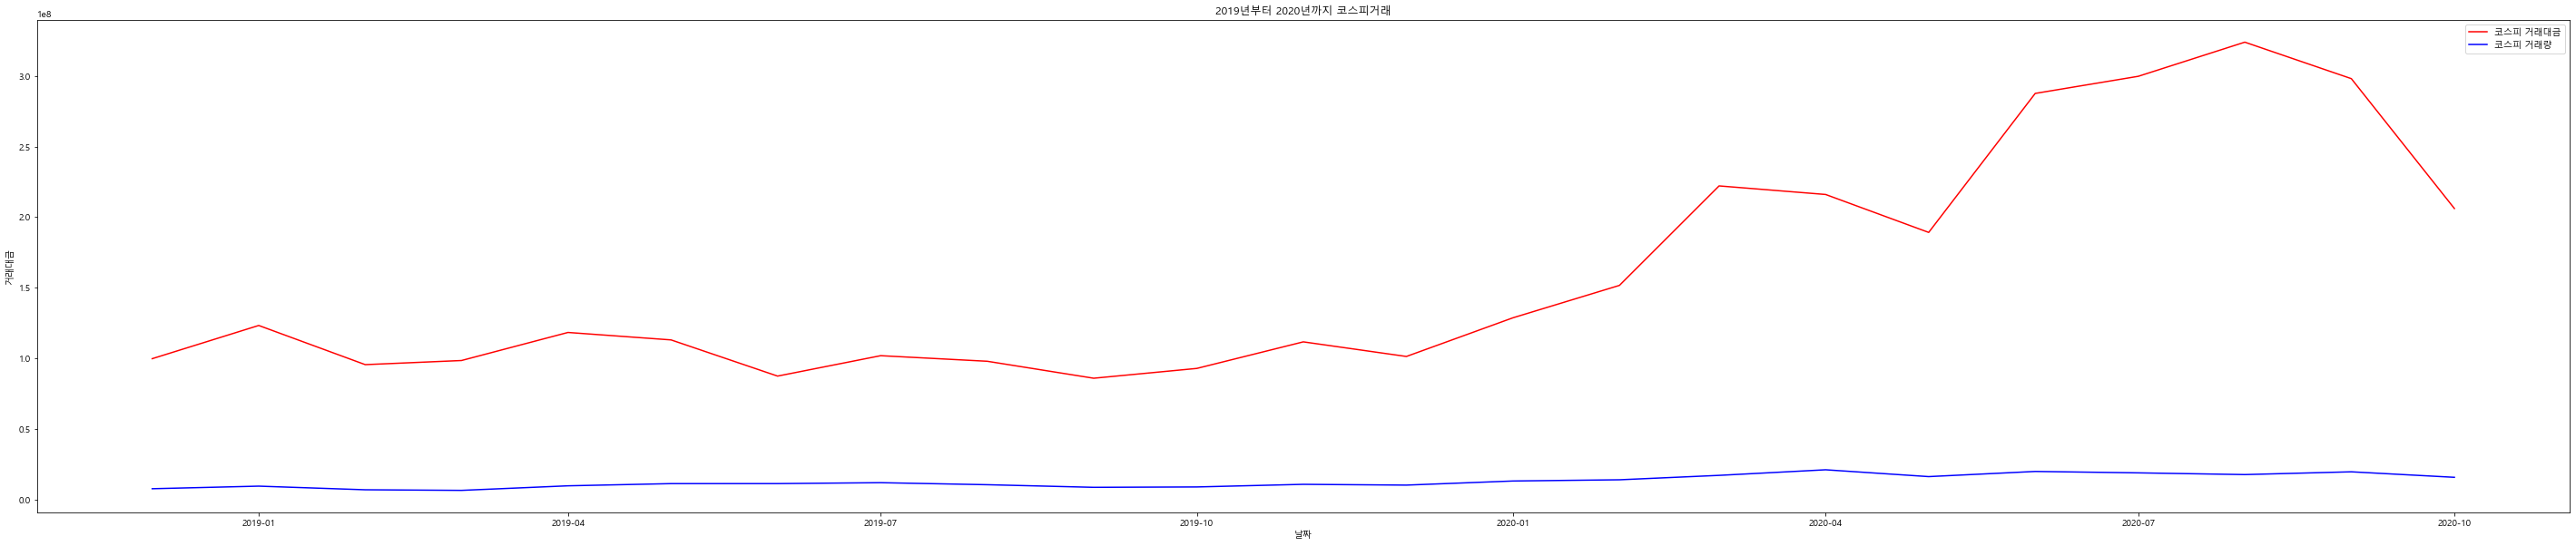

In [ ]:
plt.rcParams["figure.figsize"] = (50, 10)
fig = plt.figsize = (15,10)
plt.rc('font', family='Malgun Gothic')           # 1000주 당 백만원 단위
plt.title('2019년부터 2020년까지 코스피거래')
ax = sns.lineplot(x='날짜', y='거래대금',label='코스피 거래대금',color='red', data=stock1)   # 거래대금은 천만 단위
ax = sns.lineplot(x='날짜', y='거래량',label='코스피 거래량',color='blue', data=stock1)      # 거래량은 백만단위

- 코스피 거래대금과 거래량은 정비례하게 따라간다고는 볼수없지만, 대체적으로 같은 지표를 보인다. 코로나가 시작된 1월이후 거래량과 거래대금 또한 지속적으로 증가하며, 일시적으로 떨어진 적이 있었으나 다시금 반등세를 보이며 상승한다. 

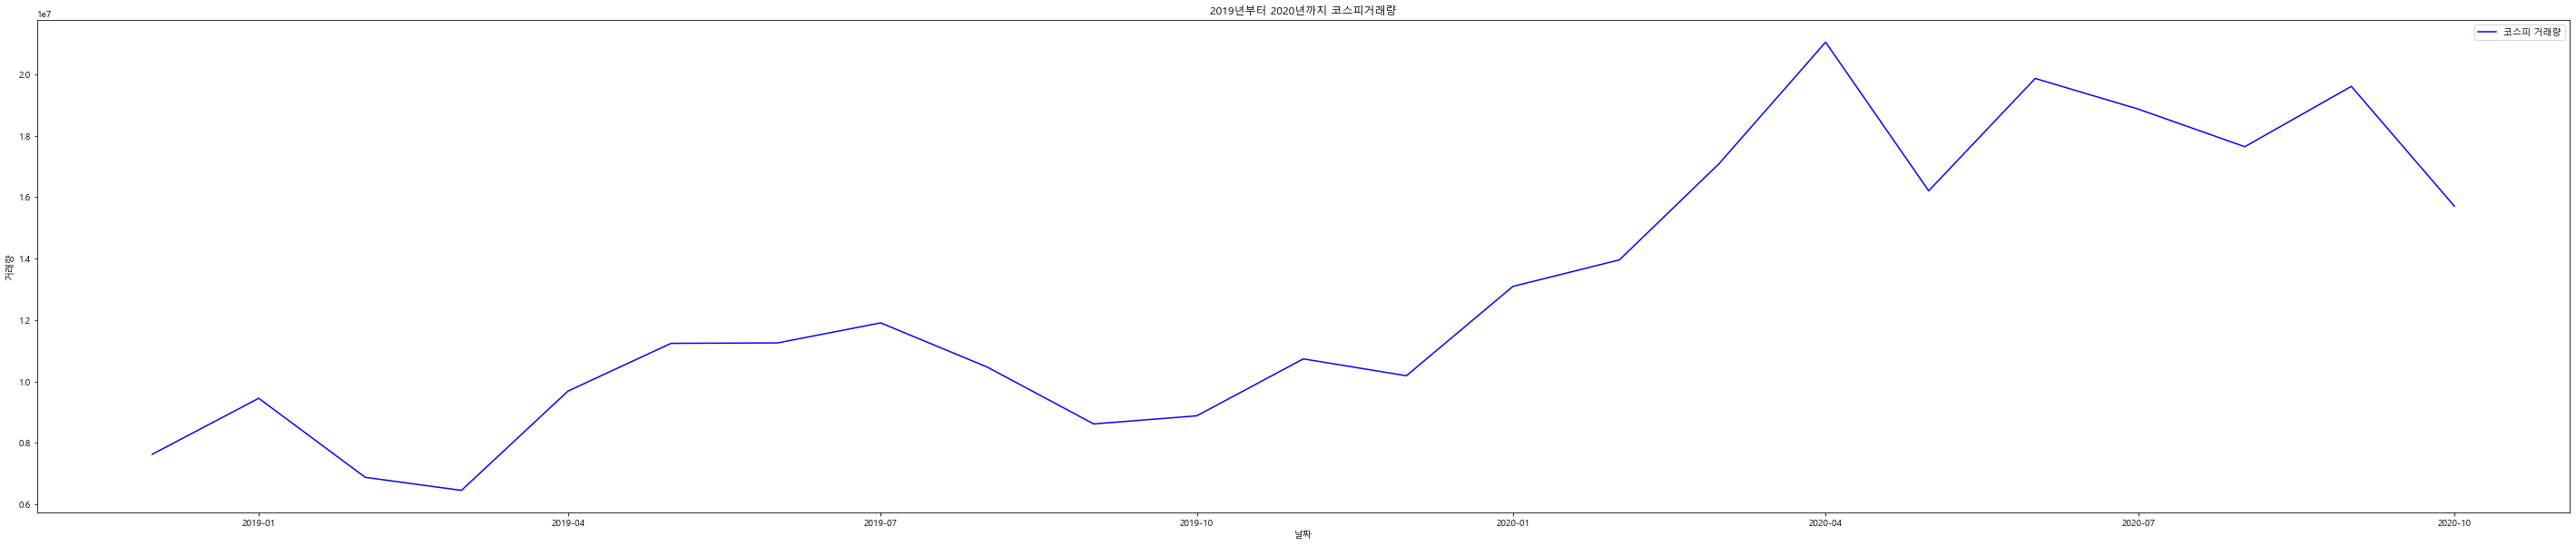

In [ ]:
plt.rcParams["figure.figsize"] = (50, 10)
fig = plt.figsize = (15,10)
plt.rc('font', family='Malgun Gothic')
plt.title('2019년부터 2020년까지 코스피거래량')
ax = sns.lineplot(x='날짜', y='거래량',label='코스피 거래량',color='blue', data=stock1)

#### 금리의 경우 지속적으로 떨어졌다. 

In [1]:
plt.title('2019년부터 2020년까지 기준금리')
ax = sns.lineplot(x='기준일자', y='기준금리',label='기준금리',color='green', data=money_rate)    # 2퍼센트 이하의 단위

NameError: ignored

In [ ]:
plt.title('2019년부터 2020년까지 코인가격')
ax = sns.lineplot(x='날짜', y='거래량',label='코인 거래량',color='black', data=filtered_co_rate)   # 단위는 

- 코인 거래량은 코인의 가격이 올라갈때마다 존버의 형태로 줄어드나, 코인가격이 떨어지는 순간부터 거래량이 늘기 시작한다. 

In [ ]:
plt.title('2019년부터 2020년까지 코인가격')
ax = sns.lineplot(x='날짜', y='종가',label='코인 가격',color='black', data=filtered_co_rate)   # 단위는 1원단위

- 코인 거래량과 코스피 거래량은 대체적으로 비슷한 면모를 보이며 상승과 하락을 반영하였다. 하지만 금리가 1%이하로 떨어진 이후로는 거래량은 비슷한 면모를 보이지않고 주식은 상승하였으나, 코인의 경우 하락하였다. 
- 다만 코인의 거래량은 급격히 상승하거나 하향하는 모습을 보이기도 하여 이는 거래량과는 무관한 다른 요소가 개입하였으리라 추측한다.  그래프상 코인의 가격은 주식의 거래량의 모습과 비슷하게 보여 주식의 보완재형태로 재테크 수단으로써 사용되었을 수 있다 생각한다.

In [ ]:
plt.rcParams["figure.figsize"] = (50, 10)
fig = plt.figsize = (15,10)
plt.rc('font', family='Malgun Gothic')
plt.title('2019년부터 2020년까지 코스피거래량')
ax = sns.lineplot(x='날짜', y='거래량',label='코스피 거래량',color='red', data=stock1)

### 코로나 이후 이전보다 악화된 가정 수입으로 재테크 수단 중 하나인 주식과 새로이 떠오른 코인은 일정부분 비슷한 우상향을 보여주었다. 금리 또한 지속적으로 떨어져 은행에 맡기는 것보다 투자가 더 효과적인 상황이라 생각할 수 있으므로 '부동산'보다 더 쉽게 투자가 가능한 재테크 수단으로 활용하였으리라 추측한다.
 - 모든 그래프를 따로 작성한 이유는 거래량과 금액등 수치들의 차이가 너무나도 심각하여 하나의 그래프로 담을 시 유의미하게 볼 수 없기 때문이다.

# 덤. 22년 지금까지 코인거래상황

In [ ]:
coin = pd.read_csv('./coin2.csv', parse_dates=['날짜'],encoding = 'cp949')  # 날짜를 datetime으로 변환, 인코딩
coin1 = coin.copy()                                                         # 원본데이터를 지키기위해 카피하여 사용
coin1

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2010-07-18,0.1,0,0.1,0.1,0.08K,0.00%
1,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
2,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
3,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
...,...,...,...,...,...,...,...
4228,2022-02-13,"42,061.10","42,205.50","42,725.10","41,880.10",25.88K,-0.34%
4229,2022-02-14,"42,550.30","42,061.10","42,799.70","41,591.30",53.60K,1.16%
4230,2022-02-15,"44,544.40","42,550.30","44,722.60","42,460.10",56.34K,4.69%
4231,2022-02-16,"43,883.60","44,540.90","44,552.90","43,377.60",41.40K,-1.48%


In [ ]:
coin1 = coin1.drop(['오픈','고가','저가','변동 %'],axis=1)            # 사용안할 데이터 드랍하여 필터링
coin1

,날짜,종가,거래량
0,2010-07-18,0.1,0.08K
1,2010-07-19,0.1,0.57K
2,2010-07-20,0.1,0.26K
3,2010-07-21,0.1,0.58K
4,2010-07-22,0.1,2.16K
...,...,...,...
4228,2022-02-13,"42,061.10",25.88K
4229,2022-02-14,"42,550.30",53.60K
4230,2022-02-15,"44,544.40",56.34K
4231,2022-02-16,"43,883.60",41.40K


In [ ]:
date = (coin1['날짜'] >= '2018-12-01') & (coin1['날짜'] <= '2022-01-30')    # 수집한 타 데이터들의 쌓인 날짜까지 인덱싱

In [ ]:
filtered_co2=coin1.loc[date]     # 필터링한 데이터 조건으로 새로운 데이터프레임 생성
filtered_co2
# filtered_co.info()            # 종가와 거래량은 오브젝트다 바꿔야 사용가능하다

,날짜,종가,거래량
3058,2018-12-01,"4,196.20",316.30K
3059,2018-12-02,"4,160.40",298.63K
3060,2018-12-03,"3,897.80",355.10K
3061,2018-12-04,"3,958.50",326.71K
3062,2018-12-05,"3,771.60",341.60K
...,...,...,...
4210,2022-01-26,"36,800.40",107.87K
4211,2022-01-27,"37,164.30",83.52K
4212,2022-01-28,"37,745.10",69.45K
4213,2022-01-29,"38,170.80",42.77K


In [ ]:
filtered_co2['거래량']=filtered_co2['거래량'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
# 거래량은 데이터에 저장되기를 103K, 10.3M형식으로 되어있었다.  
# regex=True를 설정해 정규 표현식으로 문자열 치환을 원하는 부분만 사용가능하게 하고
# map과 eval을 사용해 전체행의 문자열을 astype으로 int형으로 치환하여 계산
# https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe 자세한 사항

C:\Users\User\AppData\Local\Temp/ipykernel_16204/3277412728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_co2['거래량']=filtered_co2['거래량'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)


In [ ]:
filtered_co2['종가']=filtered_co2['종가'].str.replace(',', '').astype('float')     # ,를 제외시키고 object형에서 float형으로 치환
filtered_co2.apply(pd.to_numeric)
filtered_co2

C:\Users\User\AppData\Local\Temp/ipykernel_16204/1663851882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_co2['종가']=filtered_co2['종가'].str.replace(',', '').astype('float')     # ,를 제외시키고 object형에서 float형으로 치환


,날짜,종가,거래량
3058,2018-12-01,4196.2,316300
3059,2018-12-02,4160.4,298630
3060,2018-12-03,3897.8,355100
3061,2018-12-04,3958.5,326710
3062,2018-12-05,3771.6,341600
...,...,...,...
4210,2022-01-26,36800.4,107870
4211,2022-01-27,37164.3,83520
4212,2022-01-28,37745.1,69450
4213,2022-01-29,38170.8,42770


In [ ]:
filtered_co_rate2 = filtered_co2.groupby(filtered_co2['날짜'].dt.strftime("%y년 %m월")).mean()
filtered_co_rate2 = np.round(filtered_co_rate2.astype(np.float64),2)
filtered_co_rate2


,종가,거래량
날짜,,
18년 12월,3686.00,507906.42
19년 01월,3653.34,503783.87
19년 02월,3691.20,813042.46
19년 03월,3941.46,2637096.77
19년 04월,5148.22,1798473.67
19년 05월,7295.80,1416096.45
19년 06월,9404.71,768841.00
19년 07월,10672.51,763944.19
19년 08월,10648.52,563309.68


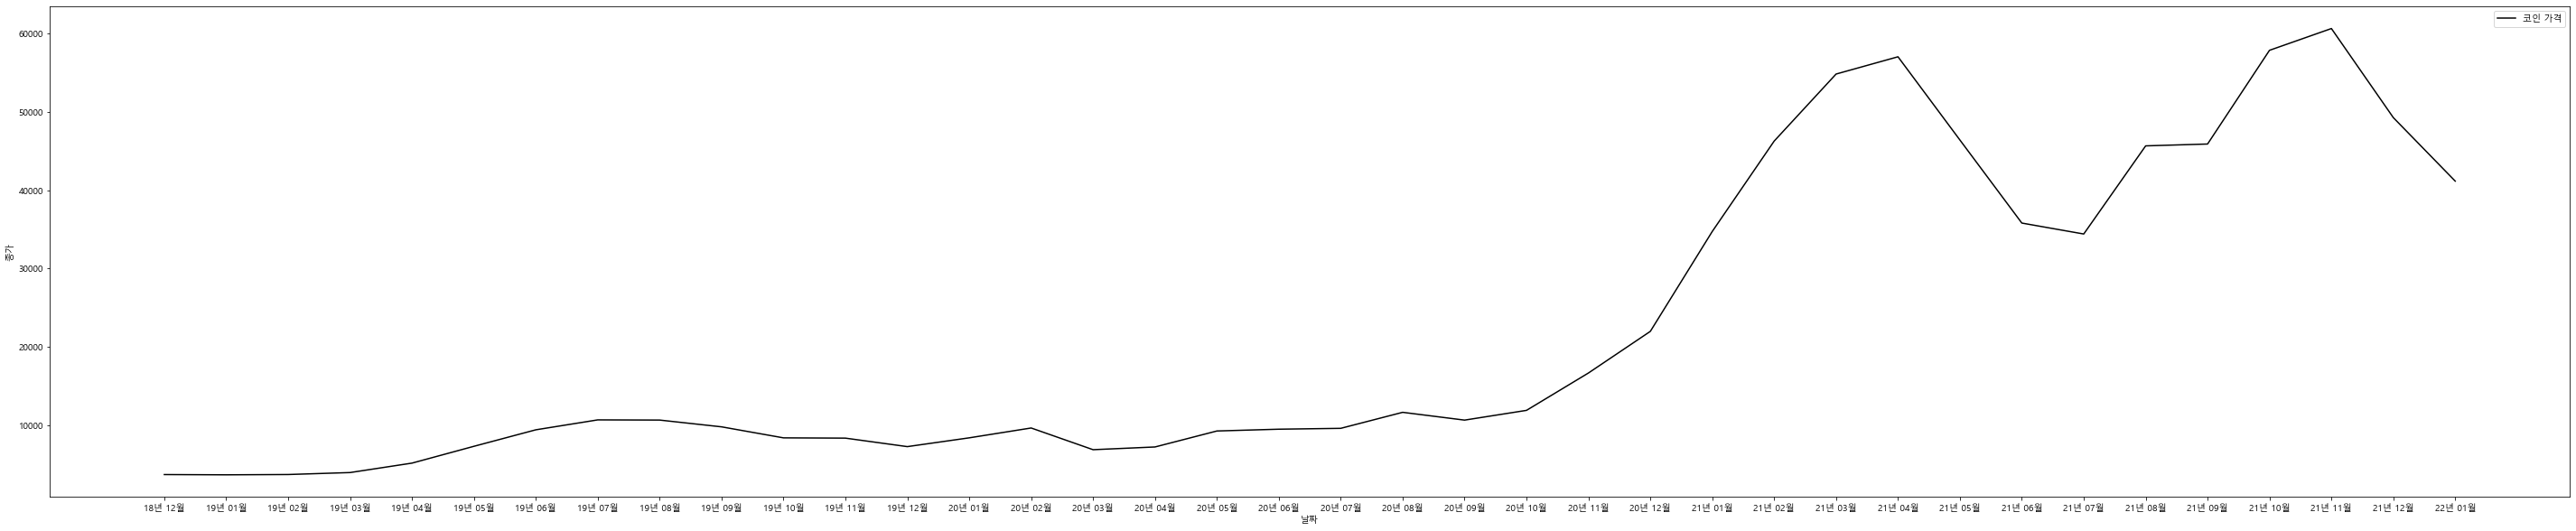

In [ ]:
ax = sns.lineplot(x='날짜', y='종가',label='코인 가격',color='black', data=filtered_co_rate2)

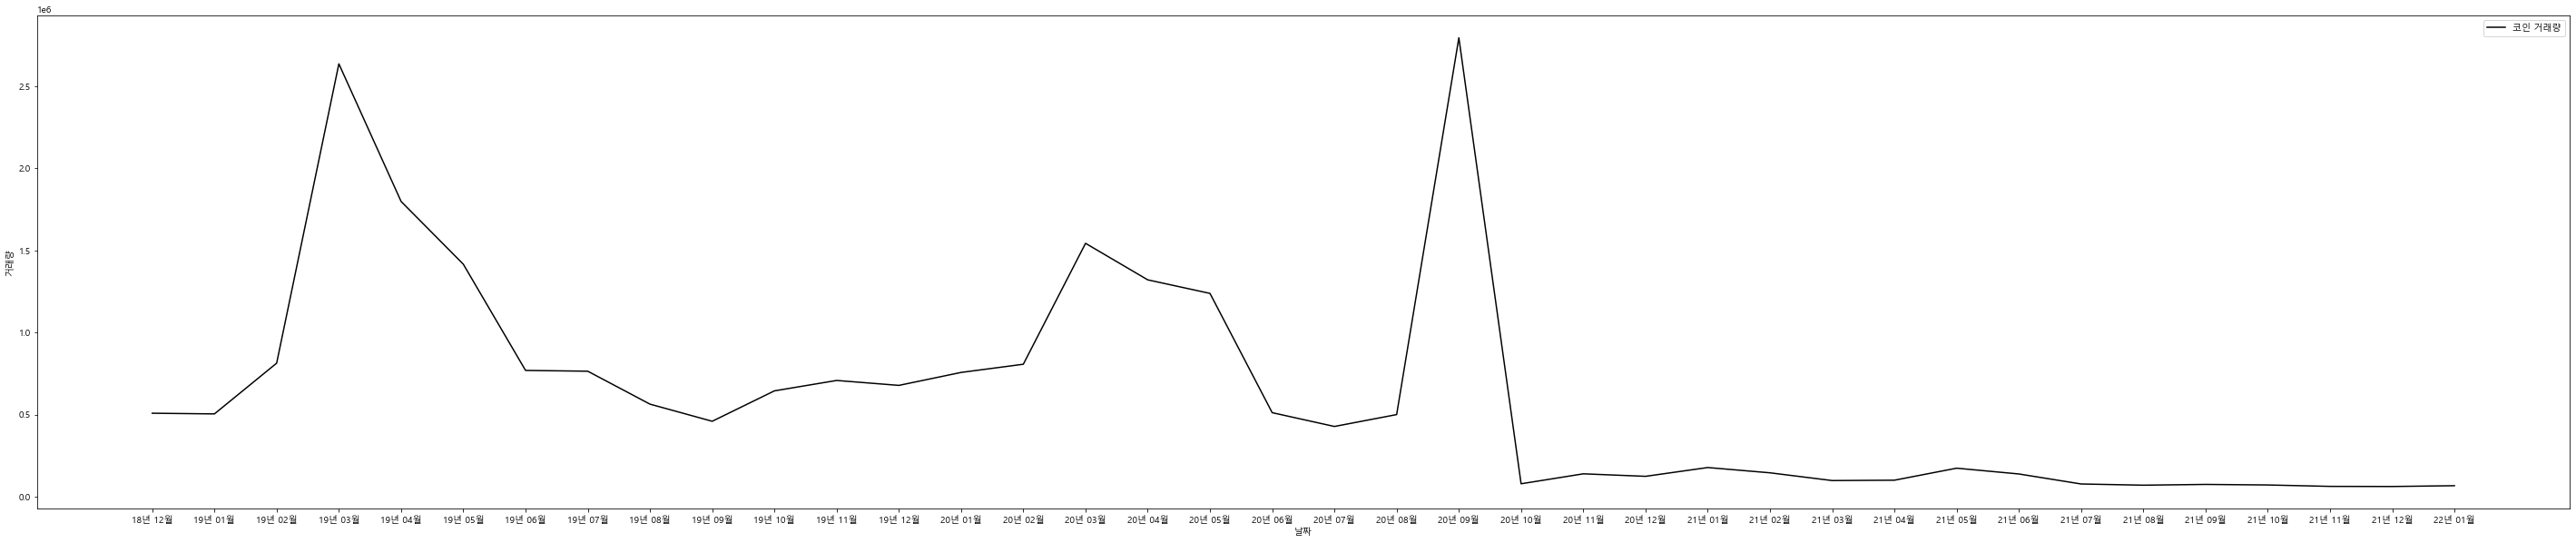

In [ ]:
ax = sns.lineplot(x='날짜', y='거래량',label='코인 거래량',color='black', data=filtered_co_rate2)
# 8-9월에 거래량이 급증하고 떨어져 내린 이유 : 이전부터 거래소 폐쇄와 더불어 정부의 과세법 제정 움직임 확인
# 단타로 치고 빠지거나 가지고 있던 매물을 빠르게 처분하려는 움직임으로 확인

지금이 코인을 투자하는게 이익이 될수도 있는 지점인가...?